# Proyecto 1 security data science (Detección de primeros frudes en una tarjeta)

## Análisis exploratorio 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv("feature_engineering_work\dataset_feature_engineering.csv")

In [4]:
# Vista general
print(df.shape)
print(df.columns)
print(df.head())

(1852394, 35)
Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'amt_month', 'amt_year', 'amt_month_shopping_net_spend',
       'count_month_shopping_net', 'first_time_at_merchant',
       'dist_between_client_and_merch', 'trans_month', 'trans_day', 'hour',
       'year', 'times_shopped_at_merchant', 'times_shopped_at_merchant_year',
       'times_shopped_at_merchant_month', 'times_shopped_at_merchant_day'],
      dtype='object')
             cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534

In [5]:
# Tipos de datos y valores nulos
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


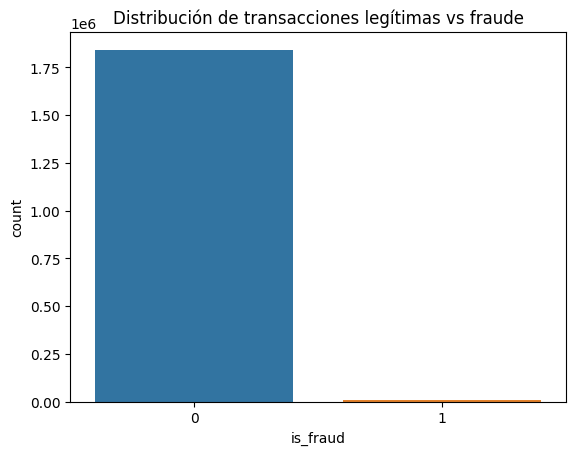

In [6]:
# Distribución de la variable objetivo
sns.countplot(data=df, x="is_fraud")
plt.title("Distribución de transacciones legítimas vs fraude")
plt.show()

In [7]:
# Porcentaje de fraudes
fraud_rate = df['is_fraud'].mean() * 100
print(f"Tasa de fraude: {fraud_rate:.2f}%")

Tasa de fraude: 0.52%


In [8]:
# Descripción estadística
print(df.describe())

             cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.014876e+05  1.819508e+07  5.105604e+00  1.

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


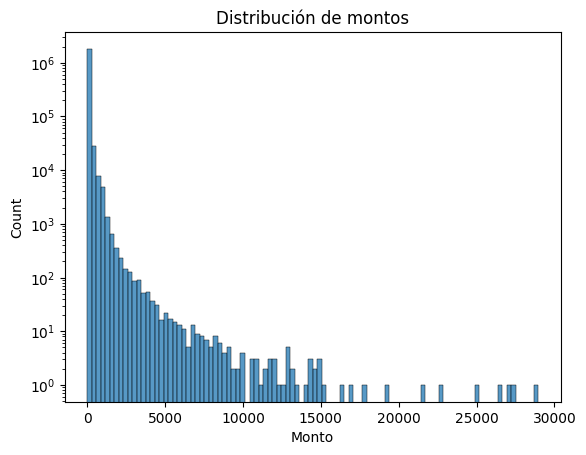

In [9]:
# Distribución de montos
sns.histplot(df['amt'], bins=100, log_scale=(False, True))
plt.title("Distribución de montos")
plt.xlabel("Monto")
plt.show()

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


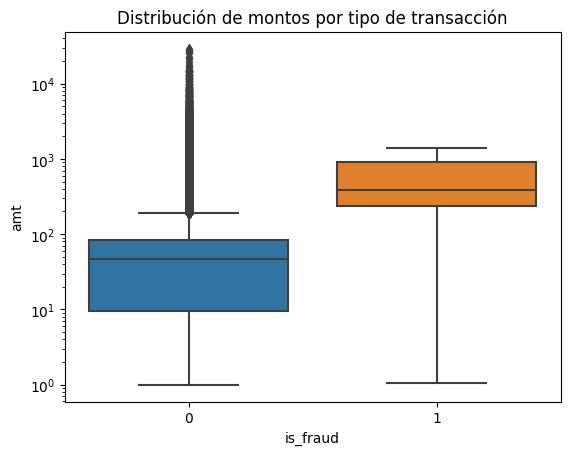

In [10]:
# Comparación de montos en fraudes vs legítimos
sns.boxplot(x="is_fraud", y="amt", data=df)
plt.yscale('log')  # Montos muy variables
plt.title("Distribución de montos por tipo de transacción")
plt.show()

## EDA para tarjetas

In [20]:
df['trans_date'] = pd.to_datetime(df['unix_time'], unit='s')
df = df.sort_values(by=['cc_num', 'trans_date'])

In [21]:
tarjetas_con_fraude = df[df['is_fraud'] == 1]['cc_num'].nunique()
print(f"Tarjetas con al menos un fraude: {tarjetas_con_fraude}")


Tarjetas con al menos un fraude: 976


In [22]:
df['trans_date'] = pd.to_datetime(df['unix_time'], unit='s')
primer_fraude_por_tarjeta = df[df['is_fraud'] == 1].sort_values(['cc_num', 'trans_date']).groupby('cc_num').first().reset_index()

primer_fraude_por_tarjeta


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day,trans_date
0,60416207185,fraud_Marks Inc,gas_transport,13.17,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,WY,...,48.011851,3,4,1,2019,6,5,1,1,2012-03-01 01:32:53
1,60422928733,fraud_VonRueden Group,grocery_net,8.05,Jeffrey,Powers,M,38352 Parrish Road Apt. 652,North Augusta,SC,...,108.095379,4,2,0,2019,1,1,1,1,2012-04-17 00:08:16
2,60423098130,fraud_Bradtke PLC,grocery_pos,317.39,Jason,Gray,M,875 Amy Point,Amorita,OK,...,59.833517,3,3,2,2019,3,3,1,1,2012-03-14 02:21:34
3,60427851591,fraud_Hudson-Ratke,grocery_pos,289.11,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,OK,...,86.105475,4,1,3,2019,1,1,1,1,2012-04-16 03:29:43
4,60487002085,"fraud_Moen, Reinger and Murphy",grocery_pos,337.39,David,White,M,66234 Hall Lock Suite 758,Jackson,MS,...,117.193549,9,1,1,2020,3,2,1,1,2013-09-22 01:11:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,4958589671582726883,fraud_Bailey-Morar,grocery_pos,285.80,Aaron,Pena,M,793 Hooper Tunnel Suite 154,Burke,VA,...,37.890299,10,5,2,2020,7,4,2,2,2013-10-17 02:48:40
972,4973530368125489546,fraud_Kuhic Inc,grocery_pos,301.54,Mary,Rodriguez,F,8986 Fitzgerald Plains,Winslow,AR,...,94.211672,8,4,0,2019,2,1,1,1,2012-08-30 00:13:53
973,4980323467523543940,fraud_Bednar Group,misc_net,690.55,Patrick,Massey,M,7812 Shane Shoals Apt. 607,North Haverhill,NH,...,69.060243,4,3,22,2020,1,1,1,1,2013-04-16 22:08:26
974,4989847570577635369,fraud_Kiehn Inc,grocery_pos,352.15,Vanessa,Anderson,F,21178 Brittney Locks,Prosperity,SC,...,63.352320,7,5,3,2020,4,2,1,1,2013-07-04 03:17:41


In [23]:
primera_transaccion = df.groupby('cc_num')['trans_date'].min().reset_index()
primer_fraude_merged = pd.merge(primer_fraude_por_tarjeta[['cc_num', 'trans_date']], primera_transaccion, on='cc_num', suffixes=('_fraude', '_inicio'))
primer_fraude_merged['dias_hasta_fraude'] = (primer_fraude_merged['trans_date_fraude'] - primer_fraude_merged['trans_date_inicio']).dt.days



In [ ]:
# Comparar categorías
sns.countplot(x='was_fraudulent', hue='category', data=first_tx)
plt.title("Distribución de categorías de transacciones")
plt.show()

In [24]:
primer_fraude_por_tarjeta['first_time_at_merchant'].value_counts(normalize=True)


first_time_at_merchant
False    0.550205
True     0.449795
Name: proportion, dtype: float64

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


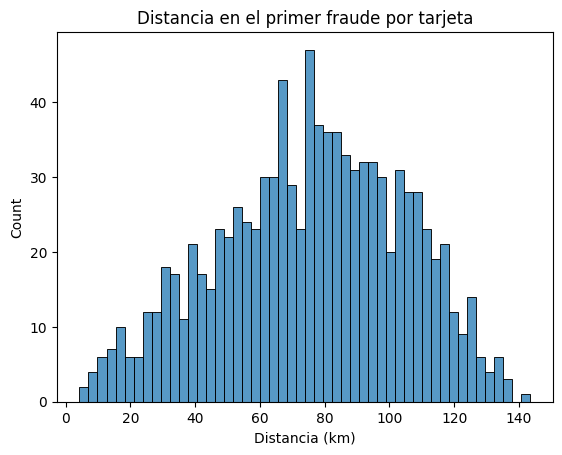

In [25]:

sns.histplot(primer_fraude_por_tarjeta['dist_between_client_and_merch'], bins=50)
plt.title("Distancia en el primer fraude por tarjeta")
plt.xlabel("Distancia (km)")
plt.show()


In [17]:
n_tarjetas_unicas = df['cc_num'].nunique()
print(f"Cantidad de tarjetas únicas: {n_tarjetas_unicas}")


Cantidad de tarjetas únicas: 999
